Import Libary

In [2]:
import numpy as np 
import pandas as pd 

import nltk

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenov\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Import Data

In [4]:
data = pd.read_csv('data/tapera.csv',encoding='latin1')

### **Prepocessing**

Case Folding

In [5]:
import re
import unicodedata

def casefolding(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'_', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [6]:
# Sample 10 random texts from the DataFrame
random_samples = data['full_text'].sample(n=10, random_state=42)

# Apply case folding to each sampled text
case_folded_samples = random_samples.apply(casefolding)

# Compare before and after case folding
comparison_df = pd.DataFrame({'Raw Data': random_samples, 'Case Folding': case_folded_samples})

# Set the option to display more characters per column
pd.set_option('display.max_colwidth', None)

# Display the comparison DataFrame
display(comparison_df)

,Raw Data,Case Folding
1133,@Cintada16 Pegawai swasta cuma dapet potongan tapera nya,cintada pegawai swasta cuma dapet potongan tapera nya
425,@tempodotco Presiden pekok,tempodotco presiden pekok
78,@polisiidol Malah di ingetin lagi padahal udh mulai lupa tapera,polisiidol malah di ingetin lagi padahal udh mulai lupa tapera
803,@lafilledhiver_k ga nyambung tapi i love you 3000 dipotong tapera https://t.co/mWt6nkQuKZ,lafilledhiverk ga nyambung tapi i love you dipotong tapera
590,@sosmedkeras mendingan cepet drpd keduluan kena tapera.. wkwkwk,sosmedkeras mendingan cepet drpd keduluan kena tapera wkwkwk
908,@bacottetangga_ lulus tk langsung kena potongan tapera,bacottetangga lulus tk langsung kena potongan tapera
881,@DrEvaChaniago Wahhh telat dok keburu dilihat om-buds-man makanya ngide tapera sampai anak kecil.,drevachaniago wahhh telat dok keburu dilihat ombudsman makanya ngide tapera sampai anak kecil
543,@CNNIndonesia Salah satu alasan x ingin diblokir karena #Kominfo gagal memblokir situs judi online jadi untuk menutupi kegagalan itu mereka sedang mencari alasan bodoh untuk memblokir x #tolakblokix . #371T dibahas bro !! #TAPERA (tabungan penderitaan buat rakyat) dibahas bro!!,cnnindonesia salah satu alasan x ingin diblokir karena kominfo gagal memblokir situs judi online jadi untuk menutupi kegagalan itu mereka sedang mencari alasan bodoh untuk memblokir x tolakblokix t dibahas bro tapera tabungan penderitaan buat rakyat dibahas bro
1194,@Bams_4GP Tapera juga sama kayaknya. Bebas Tapera buat anak2nya yg menjabat posisi.,bamsgp tapera juga sama kayaknya bebas tapera buat anaknya yg menjabat posisi
930,@hafilova Belakangan ini lebih horor Twitter daripada Tubi. Isu Tapera UKT naik PHK Korupsi buat bayar biduan. Horornya ga main2. Riil gaaan.,hafilova belakangan ini lebih horor twitter daripada tubi isu tapera ukt naik phk korupsi buat bayar biduan horornya ga main riil gaaan


Normalize

In [7]:
try:
    key_norm = pd.read_csv('data/key_norm.csv', encoding='latin1')
except UnicodeDecodeError:
    key_norm = pd.read_csv('data/key_norm.csv', encoding='ISO-8859-1')

def text_normalize(text):
    words = text.split()
    normalized_words = []
    for word in words:
        if (key_norm['singkat'] == word).any():
            normalized_word = key_norm[key_norm['singkat'] == word]['hasil'].values[0]
            print(f"Normalizing '{word}' to '{normalized_word}'")
            normalized_words.append(normalized_word)
        else:
            normalized_words.append(word)
    return ' '.join(normalized_words)

In [8]:
# Sample 10 random texts from the DataFrame
random_samples = data['full_text'].sample(n=10, random_state=42)

# Apply case folding to each sampled text
case_folded_samples = random_samples.apply(casefolding)
text_normalize_samples = case_folded_samples.apply(text_normalize)

# Compare before and after case folding
comparison_df = pd.DataFrame({'Raw Data': random_samples, 'text normalize': text_normalize_samples})

# Alternatively, if you prefer to see the comparison in tabular form
comparison_df

Normalizing 'udh' to 'sudah'
Normalizing 'you' to 'kamu'
Normalizing 'yg' to 'yang'
Normalizing 'phk' to 'pihak'


,Raw Data,text normalize
1133,@Cintada16 Pegawai swasta cuma dapet potongan tapera nya,cintada pegawai swasta cuma dapet potongan tapera nya
425,@tempodotco Presiden pekok,tempodotco presiden pekok
78,@polisiidol Malah di ingetin lagi padahal udh mulai lupa tapera,polisiidol malah di ingetin lagi padahal sudah mulai lupa tapera
803,@lafilledhiver_k ga nyambung tapi i love you 3000 dipotong tapera https://t.co/mWt6nkQuKZ,lafilledhiverk ga nyambung tapi i love kamu dipotong tapera
590,@sosmedkeras mendingan cepet drpd keduluan kena tapera.. wkwkwk,sosmedkeras mendingan cepet drpd keduluan kena tapera wkwkwk
908,@bacottetangga_ lulus tk langsung kena potongan tapera,bacottetangga lulus tk langsung kena potongan tapera
881,@DrEvaChaniago Wahhh telat dok keburu dilihat om-buds-man makanya ngide tapera sampai anak kecil.,drevachaniago wahhh telat dok keburu dilihat ombudsman makanya ngide tapera sampai anak kecil
543,@CNNIndonesia Salah satu alasan x ingin diblokir karena #Kominfo gagal memblokir situs judi online jadi untuk menutupi kegagalan itu mereka sedang mencari alasan bodoh untuk memblokir x #tolakblokix . #371T dibahas bro !! #TAPERA (tabungan penderitaan buat rakyat) dibahas bro!!,cnnindonesia salah satu alasan x ingin diblokir karena kominfo gagal memblokir situs judi online jadi untuk menutupi kegagalan itu mereka sedang mencari alasan bodoh untuk memblokir x tolakblokix t dibahas bro tapera tabungan penderitaan buat rakyat dibahas bro
1194,@Bams_4GP Tapera juga sama kayaknya. Bebas Tapera buat anak2nya yg menjabat posisi.,bamsgp tapera juga sama kayaknya bebas tapera buat anaknya yang menjabat posisi
930,@hafilova Belakangan ini lebih horor Twitter daripada Tubi. Isu Tapera UKT naik PHK Korupsi buat bayar biduan. Horornya ga main2. Riil gaaan.,hafilova belakangan ini lebih horor twitter daripada tubi isu tapera ukt naik pihak korupsi buat bayar biduan horornya ga main riil gaaan


StopWord

In [9]:
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')
len(stopwords_ind)

758

In [10]:
# menambahkan kata dalam stopword
more_stopword = ['yg', 'dg', 'rt', 'dgn', 'ny', 'd', 'klo', 'kalo', 'amp', 'biar', 'bikin', 'bilang',
                 'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                 'jd', 'jgn', 'sdh', 'aja', 'n', 't', 'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt', 
                 '&amp', 'yah', 'zy_zy', 'mh','anu','x']
stopwords_ind.extend(more_stopword)

# Remove stopwords function
def remove_stop_word(text):
    words = text.split()
    clean_words = [word for word in words if word not in stopwords_ind]
    cleaned_text = ' '.join(clean_words)
    return cleaned_text

In [11]:
# Sample 10 random texts from the DataFrame
random_samples = data['full_text'].sample(n=10, random_state=42)

# Apply case folding to each sampled text
case_folded_samples = random_samples.apply(casefolding)
text_normalize_samples = case_folded_samples.apply(text_normalize)
remove_stop_word_samples = text_normalize_samples.apply(remove_stop_word)

# Compare before and after case folding
comparison_df = pd.DataFrame({'Raw Data': random_samples, 'Remove Stop Word': remove_stop_word_samples})

# Alternatively, if you prefer to see the comparison in tabular form
comparison_df

Normalizing 'udh' to 'sudah'
Normalizing 'you' to 'kamu'
Normalizing 'yg' to 'yang'
Normalizing 'phk' to 'pihak'


,Raw Data,Remove Stop Word
1133,@Cintada16 Pegawai swasta cuma dapet potongan tapera nya,cintada pegawai swasta dapet potongan tapera
425,@tempodotco Presiden pekok,tempodotco presiden pekok
78,@polisiidol Malah di ingetin lagi padahal udh mulai lupa tapera,polisiidol ingetin lupa tapera
803,@lafilledhiver_k ga nyambung tapi i love you 3000 dipotong tapera https://t.co/mWt6nkQuKZ,lafilledhiverk nyambung i love dipotong tapera
590,@sosmedkeras mendingan cepet drpd keduluan kena tapera.. wkwkwk,sosmedkeras mendingan cepet drpd keduluan kena tapera wkwkwk
908,@bacottetangga_ lulus tk langsung kena potongan tapera,bacottetangga lulus tk langsung kena potongan tapera
881,@DrEvaChaniago Wahhh telat dok keburu dilihat om-buds-man makanya ngide tapera sampai anak kecil.,drevachaniago wahhh telat dok keburu ombudsman ngide tapera anak
543,@CNNIndonesia Salah satu alasan x ingin diblokir karena #Kominfo gagal memblokir situs judi online jadi untuk menutupi kegagalan itu mereka sedang mencari alasan bodoh untuk memblokir x #tolakblokix . #371T dibahas bro !! #TAPERA (tabungan penderitaan buat rakyat) dibahas bro!!,cnnindonesia salah alasan diblokir kominfo gagal memblokir situs judi online menutupi kegagalan mencari alasan bodoh memblokir tolakblokix dibahas bro tapera tabungan penderitaan rakyat dibahas bro
1194,@Bams_4GP Tapera juga sama kayaknya. Bebas Tapera buat anak2nya yg menjabat posisi.,bamsgp tapera kayaknya bebas tapera anaknya menjabat posisi
930,@hafilova Belakangan ini lebih horor Twitter daripada Tubi. Isu Tapera UKT naik PHK Korupsi buat bayar biduan. Horornya ga main2. Riil gaaan.,hafilova horor twitter tubi isu tapera ukt korupsi bayar biduan horornya main riil gaaan


Tokenize

In [12]:
# Tokenizing function
def tokenizing(text):
    return text.split()

In [13]:
# Sample 10 random texts from the DataFrame
random_samples = data['full_text'].sample(n=10, random_state=42)

# Apply case folding to each sampled text
case_folded_samples = random_samples.apply(casefolding)
text_normalize_samples = case_folded_samples.apply(text_normalize)
remove_stop_word_samples = text_normalize_samples.apply(remove_stop_word)
tokenizing_samples = remove_stop_word_samples.apply(tokenizing)

# Compare before and after case folding
comparison_df = pd.DataFrame({'Raw Data': random_samples, 'Tokenizing': tokenizing_samples})

# Alternatively, if you prefer to see the comparison in tabular form
comparison_df

Normalizing 'udh' to 'sudah'
Normalizing 'you' to 'kamu'
Normalizing 'yg' to 'yang'
Normalizing 'phk' to 'pihak'


,Raw Data,Tokenizing
1133,@Cintada16 Pegawai swasta cuma dapet potongan tapera nya,"[cintada, pegawai, swasta, dapet, potongan, tapera]"
425,@tempodotco Presiden pekok,"[tempodotco, presiden, pekok]"
78,@polisiidol Malah di ingetin lagi padahal udh mulai lupa tapera,"[polisiidol, ingetin, lupa, tapera]"
803,@lafilledhiver_k ga nyambung tapi i love you 3000 dipotong tapera https://t.co/mWt6nkQuKZ,"[lafilledhiverk, nyambung, i, love, dipotong, tapera]"
590,@sosmedkeras mendingan cepet drpd keduluan kena tapera.. wkwkwk,"[sosmedkeras, mendingan, cepet, drpd, keduluan, kena, tapera, wkwkwk]"
908,@bacottetangga_ lulus tk langsung kena potongan tapera,"[bacottetangga, lulus, tk, langsung, kena, potongan, tapera]"
881,@DrEvaChaniago Wahhh telat dok keburu dilihat om-buds-man makanya ngide tapera sampai anak kecil.,"[drevachaniago, wahhh, telat, dok, keburu, ombudsman, ngide, tapera, anak]"
543,@CNNIndonesia Salah satu alasan x ingin diblokir karena #Kominfo gagal memblokir situs judi online jadi untuk menutupi kegagalan itu mereka sedang mencari alasan bodoh untuk memblokir x #tolakblokix . #371T dibahas bro !! #TAPERA (tabungan penderitaan buat rakyat) dibahas bro!!,"[cnnindonesia, salah, alasan, diblokir, kominfo, gagal, memblokir, situs, judi, online, menutupi, kegagalan, mencari, alasan, bodoh, memblokir, tolakblokix, dibahas, bro, tapera, tabungan, penderitaan, rakyat, dibahas, bro]"
1194,@Bams_4GP Tapera juga sama kayaknya. Bebas Tapera buat anak2nya yg menjabat posisi.,"[bamsgp, tapera, kayaknya, bebas, tapera, anaknya, menjabat, posisi]"
930,@hafilova Belakangan ini lebih horor Twitter daripada Tubi. Isu Tapera UKT naik PHK Korupsi buat bayar biduan. Horornya ga main2. Riil gaaan.,"[hafilova, horor, twitter, tubi, isu, tapera, ukt, korupsi, bayar, biduan, horornya, main, riil, gaaan]"


Stemming

In [14]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Stemming function
factory = StemmerFactory()
stemmer = factory.create_stemmer()

additional_dict = {
    'ditindaklanjuti' : 'tindaklanjut',
    'nutupin' : 'tutup',
    'ingetin' : 'ingat',
    'keduluan': 'dulu',
    'dipahami': 'paham',
    'ditingkatkan':'tingkat',
    'diikuti':'ikut',
    'perumahan':'rumah',
    'nalangin':'bayarin',
    'nyambung': 'sambung',
    'ngaturnya':'atur',
    'ngide':'ide',
    'manfaatin':'manfaat',
    'dengerin':'dengar',
    'nyusahin': 'susah',
    'nabung':'tabung',
    'dinaikin':'naik',
    'dipaksain':'paksa',
    'dilegalin':'legal',
    'ditarikin':'tarik',
    'dimintain':'minta',
    'ngajak':'ajak',
    'disalahin':'salah',
    'mengatasnamakan':'atasnama', 
    'maksa':'paksa'  , 
    'akalin':'akal'
}

def stemming(text):
    words = text.split()
    stemmed_words = []
    for word in words:
        stemmed_word = stemmer.stem(word)
        if word in additional_dict:
            stemmed_word = additional_dict[word]
        stemmed_words.append(stemmed_word)
    return ' '.join(stemmed_words)

In [15]:
# Sample 10 random texts from the DataFrame
random_samples = data['full_text'].sample(n=10, random_state=42)

# Apply the processing steps to each sampled text
processed_samples = []
for sample in random_samples:
    case_folded = casefolding(sample)
    word_normalized = text_normalize(case_folded)
    stopword_removed = remove_stop_word(word_normalized)
    tokens = tokenizing(stopword_removed)
    stemmed = stemming(' '.join(tokens))
    processed_samples.append(stemmed)

# Create a DataFrame to compare the original and processed texts
comparison_df = pd.DataFrame({
    'Raw Data': random_samples.values,
    'Stemming': processed_samples
})

comparison_df

Normalizing 'udh' to 'sudah'
Normalizing 'you' to 'kamu'
Normalizing 'yg' to 'yang'
Normalizing 'phk' to 'pihak'


,Raw Data,Stemming
0,@Cintada16 Pegawai swasta cuma dapet potongan tapera nya,cintada pegawai swasta dapet potong tapera
1,@tempodotco Presiden pekok,tempodotco presiden kok
2,@polisiidol Malah di ingetin lagi padahal udh mulai lupa tapera,polisiidol ingat lupa tapera
3,@lafilledhiver_k ga nyambung tapi i love you 3000 dipotong tapera https://t.co/mWt6nkQuKZ,lafilledhiverk sambung i love potong tapera
4,@sosmedkeras mendingan cepet drpd keduluan kena tapera.. wkwkwk,sosmedkeras mending cepet drpd dulu kena tapera wkwkwk
5,@bacottetangga_ lulus tk langsung kena potongan tapera,bacottetangga lulus tk langsung kena potong tapera
6,@DrEvaChaniago Wahhh telat dok keburu dilihat om-buds-man makanya ngide tapera sampai anak kecil.,drevachaniago wahhh telat dok keburu ombudsman ide tapera anak
7,@CNNIndonesia Salah satu alasan x ingin diblokir karena #Kominfo gagal memblokir situs judi online jadi untuk menutupi kegagalan itu mereka sedang mencari alasan bodoh untuk memblokir x #tolakblokix . #371T dibahas bro !! #TAPERA (tabungan penderitaan buat rakyat) dibahas bro!!,cnnindonesia salah alas blokir kominfo gagal blokir situs judi online tutup gagal cari alas bodoh blokir tolakblokix bahas bro tapera tabung derita rakyat bahas bro
8,@Bams_4GP Tapera juga sama kayaknya. Bebas Tapera buat anak2nya yg menjabat posisi.,bamsgp tapera kayak bebas tapera anak jabat posisi
9,@hafilova Belakangan ini lebih horor Twitter daripada Tubi. Isu Tapera UKT naik PHK Korupsi buat bayar biduan. Horornya ga main2. Riil gaaan.,hafilova horor twitter tubi isu tapera ukt korupsi bayar biduan horor main riil gaaan


Menerapkan Semua Prepocessing pada data

In [16]:
# membuat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
    text = casefolding(text)
    text = text_normalize(text)
    text = remove_stop_word(text)
    tokens = tokenizing(text)
    text = ' '.join(tokens)
    text = stemming(text)
    return text

In [17]:
import dask.dataframe as dd

# Konversi Pandas DataFrame ke Dask DataFrame
dask_df = dd.from_pandas(data, npartitions=4)  # npartitions bisa disesuaikan sesuai dengan jumlah core CPU yang tersedia

# Jalankan apply secara paralel
dask_df['clean_teks'] = dask_df['full_text'].apply(text_preprocessing_process, meta=('x', 'str'))

# Konversi kembali ke Pandas DataFrame jika diperlukan
data = dask_df.compute()

c:\Program Files\Python312\Lib\site-packages\dask\dataframe\__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Normalizing 'blm' to 'belum'
Normalizing 'plis' to '*memohon'
Normalizing 'yg' to 'yang'
Normalizing 'sampe' to 'sampai'
Normalizing 'ngurusin' to 'mengurusi'
Normalizing 'yg' to 'yang'
Normalizing 'bis' to 'habis'
Normalizing 'ngerampok' to 'merampok'
Normalizing 'ngambil' to 'mengambil'
Normalizing 'yg' to 'yang'
Normalizing 'naon' to 'apa'
Normalizing 'sampe' to 'sampai'
Normalizing 'ngomel' to 'mengomel'
Normalizing 'yg' to 'yang'
Normalizing 'ntar' to 'nanti'
Normalizing 'aku' to 'saya'
Normalizing 'aja' to 'saja'
Normalizing 'yg' to 'yang'Normalizing 'nggak' to 'tidak'

Normalizing 'yg' to 'yang'
Normalizing 'yg' to 'yang'
Normalizing 'trus' to 'terus'
Normalizing 'mw' to 'mau'
Normalizing 'aj' to 'saja'
Normalizing 'yg' to 'yang'
Normalizing 'aja' to 'saja'
Normalizing 'udh' to 'sudah'
Normalizing 'pengen' to 'ingin'
Normalizing 'pake' to 'pakai'
Normalizing 'yg' to 'yang'
Normalizing 'udah' to 'sudah'
Normalizing 'ngisi' to 'mengisi'
Normalizing 'ntar' to 'nanti'
Normalizing 'y

In [18]:
data = data[data['clean_teks'].str.strip() != '']

In [20]:
data['clean_teks'].shape

(1202,)

### **Translate Data**

In [ ]:
from deep_translator import GoogleTranslator
from concurrent.futures import ThreadPoolExecutor

def convert_eng(tweet):
    translation = GoogleTranslator(source='id', target='en').translate(tweet)
    return translation

# Function to apply translation to a chunk of data
def translate_chunk(chunk):
    return chunk.apply(convert_eng)

# Assuming 'data' is your dataframe loaded from the CSV
# Split the data into chunks, for example, 10 chunks
num_chunks = 10
chunks = np.array_split(data['clean_teks'], num_chunks)

# Create a ThreadPoolExecutor
with ThreadPoolExecutor(max_workers=num_chunks) as executor:
    # Map the translate_chunk function to the chunks
    results = list(executor.map(translate_chunk, chunks))

# Concatenate the results back into a single series
data['tweet_english'] = pd.concat(results).reset_index(drop=True)


In [ ]:
data['tweet_english'] = data['tweet_english'].apply(casefolding)

In [ ]:
data['tweet_english'].head(10)

0                                                        bp tapera was firm and the followup was completed mbappe vishnu ipk morning meat
1                                                                                                                       pay stupid tapera
2                                                                                                                  project hey tapera pay
3                                                                                       tapera stupid order canang land bank faisal basri
4                                            grumbling about the tapera case perhaps civil servants are closing private employment tapera
5                                                                          tapera leave example of behavior command like less work rights
6                                                                                      morning spirit tapera residents spirit of activity
7                                t

In [ ]:
# data[['clean_teks','tweet_english']].to_csv('hasiltranslate.csv', index=False)


### **Labeling Data**

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Inisiasi VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Tambahan kata-kata positif dan negatif ke kamus VADER
additional_pos_words = [
     'savings', 'give', 'choose', 'home', 'community', 'job', 
    'working', 'life', 'minister', 'society', 'team', 'invest', 'investors'
]

additional_neg_words = [
    'gambling', 'corruption', 'taxes', 'issue', 'orders', 'out', 'viral', 
    'cost', 'force', 'police', 'afraid', 'used', 'dynasty', 'afraid', 'corruption'
]

# Menambahkan kata-kata dengan skor ke kamus VADER
for word in additional_pos_words:
    sid.lexicon[word] = 2.0  # Nilai positif tinggi untuk kata positif

for word in additional_neg_words:
    sid.lexicon[word] = -2.0  # Nilai negatif tinggi untuk kata negatif

In [ ]:
def vader_sentiment(text):
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0.01:
        return 'positive'
    else:
        return 'negative'

In [ ]:
data['sentiment'] = data['tweet_english'].apply(vader_sentiment)
kolom = ['sentiment','clean_teks', 'tweet_english']
data[kolom].head(10)

,sentiment,clean_teks,tweet_english
0,negative,bp tapera tegas serta tindaklanjut selesai mbappe wisnu ipk daging pagi,bp tapera was firm and the followup was completed mbappe vishnu ipk morning meat
1,negative,bayar tapera goblok,pay stupid tapera
2,negative,projo eitss tapera bayarin,project hey tapera pay
3,negative,tapera perintah tolol canang bank tanah faisal basri,tapera stupid order canang land bank faisal basri
4,negative,omel perkara tapera yakali pns tutup tapera kerja swasta,grumbling about the tapera case perhaps civil servants are closing private employment tapera
5,positive,cuti tapera contoh laku perintah suka kurang hak kerja,tapera leave example of behavior command like less work rights
6,positive,semangat pagi warga tapera semangat aktivitas,morning spirit tapera residents spirit of activity
7,positive,kasi banget orang indonesia gaji potong pajak bpjs kes bpjs tk tapera keluarga pas nikah,thank you very much for indonesians salary withholding bpjs tax bpjs case tk tapera family upon marriage
8,negative,benci banget tapera pajak gaji emosi tambah tapera gaji nyundut pakai roko deh bkin emosi kecuali duit duit,i really hate salary tax tapera im emotional adding salary tapera is covered using roko it makes me emotional except for money money
9,positive,menteri sayang warga tapera basuki ogah tinggal ikn,minister loves tapera residents basuki doesnt want to stay ikn


In [ ]:
# data[['clean_teks', 'tweet_english', 'sentiment']].to_csv("hasillabelling.csv", index=False)

Distribusi Label

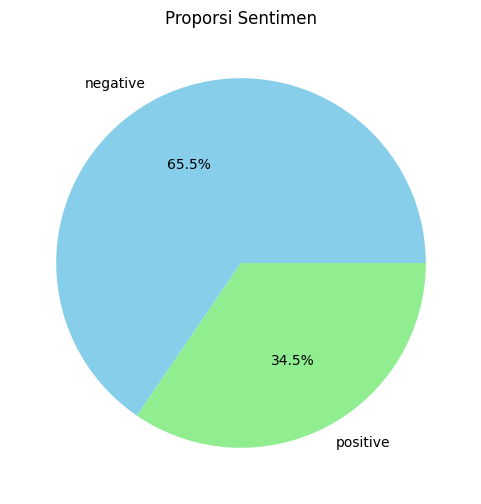

In [ ]:
# Menghitung jumlah masing-masing sentimen
sentimen_counts = data['sentiment'].value_counts()

# Plot diagram lingkaran
plt.figure(figsize=(6, 6))
plt.pie(sentimen_counts, labels=sentimen_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen','lightcoral'])
plt.title('Proporsi Sentimen')
plt.show()

Text Positif pada Data

Text(0.5, 1.0, 'Word Cloud untuk Sentimen Positif')

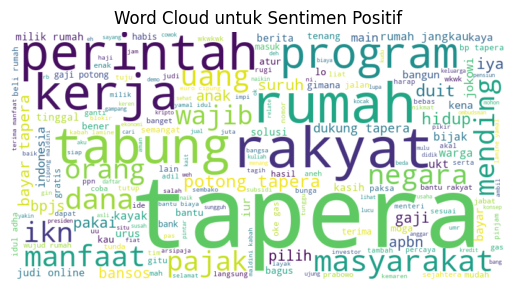

In [ ]:
from wordcloud import WordCloud

# Memfilter data untuk masing-masing sentimen
positive_tweets = data[data['sentiment'] == 'positive']['clean_teks']
negative_tweets = data[data['sentiment'] == 'negative']['clean_teks']

# Membuat WordCloud untuk sentimen positif
all_positive_text = ' '.join(positive_tweets)
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(all_positive_text)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk Sentimen Positif')

Text Negatif pada Data

Text(0.5, 1.0, 'Word Cloud untuk Sentimen Negatif')

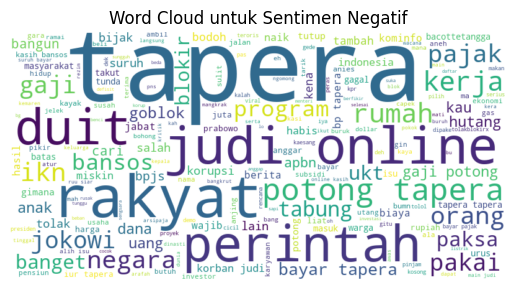

In [ ]:
from wordcloud import WordCloud

# Membuat WordCloud untuk sentimen negatif
all_negative_text = ' '.join(negative_tweets)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(all_negative_text)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk Sentimen Negatif')

### **TF-Idf**

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pickle

data = pd.read_csv('data/hasillabelling.csv')

# Fitting the vectorizer
tfidf = TfidfVectorizer(max_features=8000)
tfidf.fit(data['clean_teks'])
X_tfidf = tfidf.transform(data['clean_teks'])

y = data['sentiment']

# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_tfidf, y)

# Check label counts after SMOTE
print("Label counts after SMOTE:")
print(pd.Series(y_smote).value_counts())

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Display train and test set shapes
print(f"Train set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Label counts after SMOTE:
sentiment
negative    787
positive    787
Name: count, dtype: int64
Train set shape: (1259, 3593), (1259,)
Test set shape: (315, 3593), (315,)


In [24]:
# Get the feature names (terms)
terms = tfidf.get_feature_names_out()

# Function to get terms with non-zero TF-IDF scores
def get_tfidf_terms(doc_index):
    tfidf_row = X_tfidf[doc_index]
    non_zero_indices = tfidf_row.nonzero()[1]  # Get indices of non-zero elements
    terms_weights = [(terms[i], tfidf_row[0, i]) for i in non_zero_indices]
    return terms_weights

# Iterate over the first 10 documents and display their TF-IDF terms and weights
for i, text in enumerate(data['clean_teks'].head(10)):
    print(f"Text: {text}")
    print("TF-IDF Terms and Weights:")
    terms_weights = get_tfidf_terms(i)
    for term, weight in terms_weights:
        print(f"{term}: {weight:.4f}")
    print("\n" + "-"*80 + "\n")

Text: bp tapera tegas serta tindaklanjut selesai mbappe wisnu ipk daging pagi
TF-IDF Terms and Weights:
bp: 0.2445
daging: 0.3198
ipk: 0.3450
mbappe: 0.3650
pagi: 0.3032
selesai: 0.2966
serta: 0.2690
tapera: 0.0532
tegas: 0.3198
tindaklanjut: 0.3450
wisnu: 0.3308

--------------------------------------------------------------------------------

Text: bayar tapera goblok
TF-IDF Terms and Weights:
bayar: 0.5975
goblok: 0.7833
tapera: 0.1718

--------------------------------------------------------------------------------

Text: projo eitss tapera bayarin
TF-IDF Terms and Weights:
bayarin: 0.5247
eitss: 0.5988
projo: 0.5988
tapera: 0.0872

--------------------------------------------------------------------------------

Text: tapera perintah tolol canang bank tanah faisal basri
TF-IDF Terms and Weights:
bank: 0.3610
basri: 0.4283
canang: 0.4283
faisal: 0.4283
perintah: 0.2077
tanah: 0.3764
tapera: 0.0660
tolol: 0.3610

----------------------------------------------------------------------

In [25]:
from collections import defaultdict

# Get the feature names (terms)
terms = tfidf.get_feature_names_out()

# Function to get terms with non-zero TF-IDF scores and their weights
def get_tfidf_terms(doc_index):
    tfidf_row = X_tfidf[doc_index]
    non_zero_indices = tfidf_row.nonzero()[1]  # Get indices of non-zero elements
    terms_weights = [(terms[i], tfidf_row[0, i]) for i in non_zero_indices]
    return terms_weights

# Dictionary to hold the top 20 TF-IDF weights for each label
top_20_tfidf_per_label = defaultdict(lambda: defaultdict(float))

# Iterate over all documents
for i, (text, label) in enumerate(zip(data['clean_teks'], data['sentiment'])):
    terms_weights = get_tfidf_terms(i)
    
    # Aggregate the TF-IDF weights for each term per label
    for term, weight in terms_weights:
        if term.lower() != "tapera":  # Exclude the term "tapera"
            top_20_tfidf_per_label[label][term] += weight

# Process the top 20 terms for each label
top_20_tfidf_final = {}
for label, terms_weights_dict in top_20_tfidf_per_label.items():
    # Sort by TF-IDF weight in descending order and keep the top 20
    sorted_terms_weights = sorted(terms_weights_dict.items(), key=lambda x: x[1], reverse=True)[:20]
    top_20_tfidf_final[label] = sorted_terms_weights

# Display the top 20 TF-IDF weights for each label
for label, top_terms in top_20_tfidf_final.items():
    print(f"Label: {label}")
    print("Top 20 Terms with Highest TF-IDF Weights:")
    for term, weight in top_terms:
        print(f"{term}: {weight:.4f}")
    print("\n" + "-"*80 + "\n")


Label: negative
Top 20 Terms with Highest TF-IDF Weights:
potong: 28.8310
judi: 17.6051
bayar: 16.6868
gaji: 16.5961
rakyat: 15.3966
online: 14.3278
perintah: 14.2580
duit: 13.7951
goblok: 12.3030
program: 11.6356
rumah: 11.3097
pajak: 10.6787
kerja: 10.6708
ikn: 10.4326
bansos: 10.3580
jokowi: 10.0315
pakai: 9.7739
tabung: 9.4556
negara: 9.3297
orang: 8.6931

--------------------------------------------------------------------------------

Label: positive
Top 20 Terms with Highest TF-IDF Weights:
rumah: 15.6231
manfaat: 11.3435
dukung: 9.1768
tabung: 9.1254
rakyat: 8.3389
program: 7.9726
bayar: 6.5615
bantu: 6.4758
potong: 6.3182
kerja: 6.2576
masyarakat: 6.2530
wajib: 6.0857
perintah: 6.0636
mending: 6.0446
jangkau: 5.0874
gaji: 5.0122
dana: 4.9856
tenang: 4.9388
suruh: 4.9049
iya: 4.8617

--------------------------------------------------------------------------------



### **Model Development**

In [ ]:
data = pd.read_csv('data/hasillabelling.csv')

Train Test Split

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=8000)
X_tfidf = tfidf.fit_transform(data['clean_teks'])
y = data['sentiment']

# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_tfidf, y)

# Check label counts after SMOTE
print("Label counts after SMOTE:")
print(pd.Series(y_smote).value_counts())

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Print shapes of the train and test sets
print(f"Train set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Label counts after SMOTE:
sentiment
negative    787
positive    787
Name: count, dtype: int64
Train set shape: (1259, 3593), (1259,)
Test set shape: (315, 3593), (315,)


Naive Bayes

In [ ]:
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
from scipy.stats import uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

# Preprocessing function with lemmatization
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

# Apply preprocessing to the data
data['clean_teks'] = data['clean_teks'].apply(preprocess_text)

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 3), sublinear_tf=True)
X_tfidf = tfidf.fit_transform(data['clean_teks'])
y = data['sentiment']

# Apply SMOTETomek to balance the data
smote_tomek = SMOTETomek(random_state=42)
X_smote, y_smote = smote_tomek.fit_resample(X_tfidf, y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Define the Multinomial Naive Bayes model
nb_model = MultinomialNB()

# Define the parameter grid for advanced hyperparameter tuning
nb_params = {
    'alpha': uniform(0.01, 1.0)  # Uniform distribution for alpha with a wider range
}

# Perform RandomizedSearchCV
nb_random = RandomizedSearchCV(nb_model, nb_params, n_iter=100, cv=15, scoring='accuracy', random_state=42, n_jobs=-1)
nb_random.fit(X_train, y_train)

# Get the best estimator and predictions
nb_best = nb_random.best_estimator_
nb_pred = nb_best.predict(X_test)
accuracy_nb = accuracy_score(y_test, nb_pred)
precision_nb = precision_score(y_test, nb_pred, average='weighted')
recall_nb = recall_score(y_test, nb_pred, average='weighted')
f1_nb = f1_score(y_test, nb_pred, average='weighted')
nb_report = classification_report(y_test, nb_pred)

# Display the best parameters and classification report
print("Best Parameters:", nb_random.best_params_)
print(f"Naive Bayes - Accuracy: {accuracy_nb}")
print(f"Naive Bayes - Precision: {precision_nb}")
print(f"Naive Bayes - Recall: {recall_nb}")
print(f"Naive Bayes - F1 Score: {f1_nb}")

# Generate classification report
class_report_nb = classification_report(y_test, nb_pred, target_names=['negative', 'positive'])
print("\nClassification Report:\n")
print(class_report_nb)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Reyhan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Reyhan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Best Parameters: {'alpha': 0.07505159298527951}
Naive Bayes - Accuracy: 0.8471337579617835
Naive Bayes - Precision: 0.8550326992309824
Naive Bayes - Recall: 0.8471337579617835
Naive Bayes - F1 Score: 0.8460071643011676

Classification Report:

              precision    recall  f1-score   support

    negative       0.91      0.77      0.83       154
    positive       0.80      0.93      0.86       160

    accuracy                           0.85       314
   macro avg       0.86      0.85      0.85       314
weighted avg       0.86      0.85      0.85       314



Klasifikasi Naive Bayes

In [ ]:
# Function to classify new input text
def classify_text(text, vectorizer, model):
    # Add your text preprocessing steps here
    processed_text = text_preprocessing_process(text)
    text_tfidf = vectorizer.transform([processed_text])
    nb_prediction = model.predict(text_tfidf)
    
    return {'nb': nb_prediction[0]}

# Example usage with user input
input_text = input("Masukkan teks yang ingin diklasifikasikan: ")
results = classify_text(input_text, tfidf, nb_best)

print("Input kata:", input_text)
print("\nHasil Klasifikasi:")
for model, prediction in results.items():
    print(f"{model}: {prediction}")

Input kata: goblok

Hasil Klasifikasi:
nb: negative


SVM

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Define the SVM model
svm_model = SVC()

# Define the parameter grid for advanced hyperparameter tuning
svm_params = {
    'C': uniform(0.1, 100),  # Uniform distribution between 0.1 and 100
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Including more kernel types
    'degree': [2, 3, 4, 5, 6, 7, 8, 10],  # Expanded range for 'poly' kernel
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10],  # Expanded range for 'rbf', 'poly', and 'sigmoid' kernels
    'coef0': [0.0, 0.1, 0.5, 1.0, 2.0, 3.0],  # Expanded range for 'poly' and 'sigmoid' kernels
    'class_weight': [None, 'balanced'],  # Class weight options
    'shrinking': [True, False],  # Shrinking heuristic
    'tol': [1e-3, 1e-4, 1e-5],  # Tolerance for stopping criteria
    'max_iter': [1000, 2000, 3000, 4000, 5000]  # Maximum number of iterations
}

# Perform RandomizedSearchCV
svm_random = RandomizedSearchCV(svm_model, svm_params, n_iter=50, cv=15, scoring='accuracy', random_state=42, n_jobs=-1)
svm_random.fit(X_train, y_train)

# Get the best estimator and predictions
svm_best = svm_random.best_estimator_
svm_pred = svm_best.predict(X_test)
accuracy_svm = accuracy_score(y_test, svm_pred)
precision_svm = precision_score(y_test, svm_pred, average='weighted')
recall_svm = recall_score(y_test, svm_pred, average='weighted')
f1_svm = f1_score(y_test, svm_pred, average='weighted')
svm_report = classification_report(y_test, svm_pred)

# Display the best parameters and classification report
svm_random.best_params_, svm_random.best_score_

print(f"SVM - Accuracy: {accuracy_svm}")
print(f"SVM - Precision: {precision_svm}")
print(f"SVM - Recall: {recall_svm}")
print(f"SVM - F1 Score: {f1_svm}")

# Generate classification report
class_report = classification_report(y_test, svm_pred, target_names=['negative', 'positive'])
print("\nClassification Report:\n")
print(class_report)

SVM - Accuracy: 0.8821656050955414
SVM - Precision: 0.8849837047599849
SVM - Recall: 0.8821656050955414
SVM - F1 Score: 0.8820567947823275

Classification Report:

              precision    recall  f1-score   support

    negative       0.85      0.92      0.88       154
    positive       0.92      0.84      0.88       160

    accuracy                           0.88       314
   macro avg       0.88      0.88      0.88       314
weighted avg       0.88      0.88      0.88       314



Klasifikasi SVM

In [ ]:
def classify_text(text, vectorizer, model):
    # Add your text preprocessing steps here
    processed_text = text_preprocessing_process(text)
    text_tfidf = vectorizer.transform([processed_text])
    svm_pred = model.predict(text_tfidf)
    
    return {'SVC': svm_pred[0]}

# Example usage with user input
input_text = input("Masukkan teks yang ingin diklasifikasikan: ")
results = classify_text(input_text, tfidf, svm_best)  

print("Input kata:", input_text)
print("\nHasil Klasifikasi:")
for model, prediction in results.items():
    print(f"{model}: {prediction}")


Input kata: goblok

Hasil Klasifikasi:
SVC: negative


Salah Prediksi 

In [ ]:
data = pd.read_csv('hasillabelling.csv')
data = data.reset_index(drop=True)

# Prediksi menggunakan model SVM
svm_pred = svm_best.predict(X_test)  # Gunakan model yang sudah dilatih (svm_best)

# Prediksi menggunakan model Naive Bayes
nb_pred = nb_best.predict(X_test)

# Reset index pada y_test setelah split
y_test = y_test.reset_index(drop=True)

# Identifikasi kesalahan klasifikasi untuk SVM
df_salah_klasifikasi_svm = pd.DataFrame({
    'Kalimat': data.loc[y_test.index, 'clean_teks'],
    'Label Asli': y_test,
    'Prediksi SVM': svm_pred
})
df_salah_klasifikasi_svm = df_salah_klasifikasi_svm[df_salah_klasifikasi_svm['Label Asli'] != df_salah_klasifikasi_svm['Prediksi SVM']]

# Identifikasi kesalahan klasifikasi untuk Naive Bayes
df_salah_klasifikasi_nb = pd.DataFrame({
    'Kalimat': data.loc[y_test.index, 'clean_teks'],
    'Label Asli': y_test,
    'Prediksi Naive Bayes': nb_pred
})
df_salah_klasifikasi_nb = df_salah_klasifikasi_nb[df_salah_klasifikasi_nb['Label Asli'] != df_salah_klasifikasi_nb['Prediksi Naive Bayes']]

# Tampilkan kalimat yang salah klasifikasi oleh SVM
print("\nKalimat yang salah klasifikasi oleh SVM:")
print(df_salah_klasifikasi_svm[['Kalimat', 'Label Asli', 'Prediksi SVM']])

# Tampilkan kalimat yang salah klasifikasi oleh Naive Bayes
print("\nKalimat yang salah klasifikasi oleh Naive Bayes:")
print(df_salah_klasifikasi_nb[['Kalimat', 'Label Asli', 'Prediksi Naive Bayes']])

pd.options.display.max_colwidth = 100  # Set maximum column width to display long texts
pd.set_option('display.expand_frame_repr', False)  # Avoid wrapping of the dataframe


Kalimat yang salah klasifikasi oleh SVM:
                                                                                                                                                                                       Kalimat Label Asli Prediksi SVM
4                                                                                                                                     omel perkara tapera yakali pns tutup tapera kerja swasta   positive     negative
6                                                                                                                                                semangat pagi warga tapera semangat aktivitas   positive     negative
11                                                                                                                                                            woee pagi kirim sms tagih tapera   negative     positive
22                                                                                                

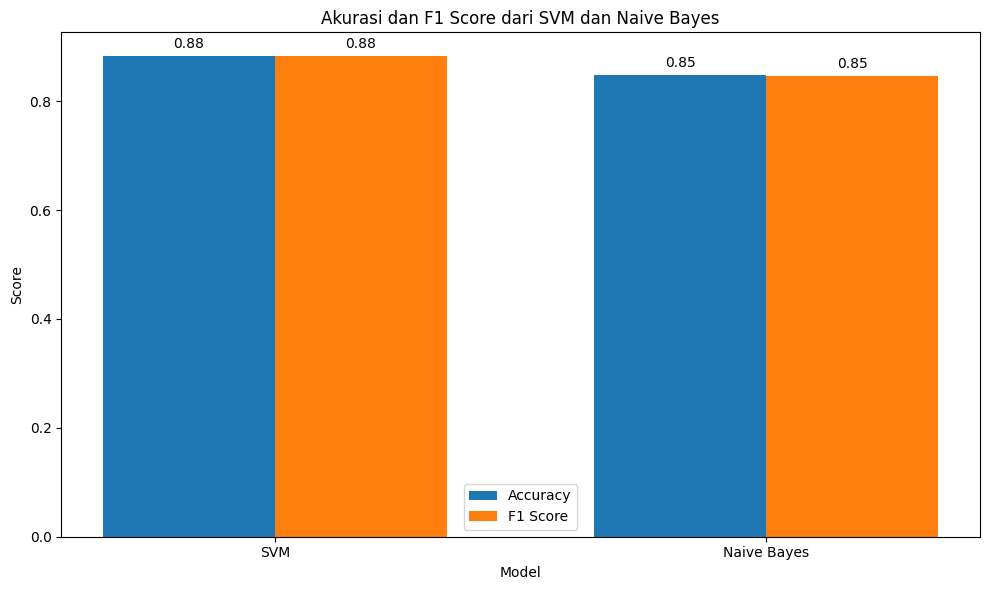

In [ ]:
# Define the labels and values
models = ['SVM', 'Naive Bayes']
accuracy = [accuracy_svm, accuracy_nb]
f1_scores = [f1_svm, f1_nb]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot accuracy and F1 score for both models
bar_width = 0.35
index = range(len(models))

bar1 = plt.bar(index, accuracy, bar_width, label='Accuracy')
bar2 = plt.bar([i + bar_width for i in index], f1_scores, bar_width, label='F1 Score')

# Add labels, title, and legend
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Akurasi dan F1 Score dari SVM dan Naive Bayes')
plt.xticks([i + bar_width / 2 for i in index], models)
plt.legend()

# Add value labels on top of the bars
for bar in bar1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 2), ha='center', va='bottom')
    
for bar in bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrices
conf_matrix_svm = confusion_matrix(y_test, svm_pred)
conf_matrix_nb = confusion_matrix(y_test, nb_pred)

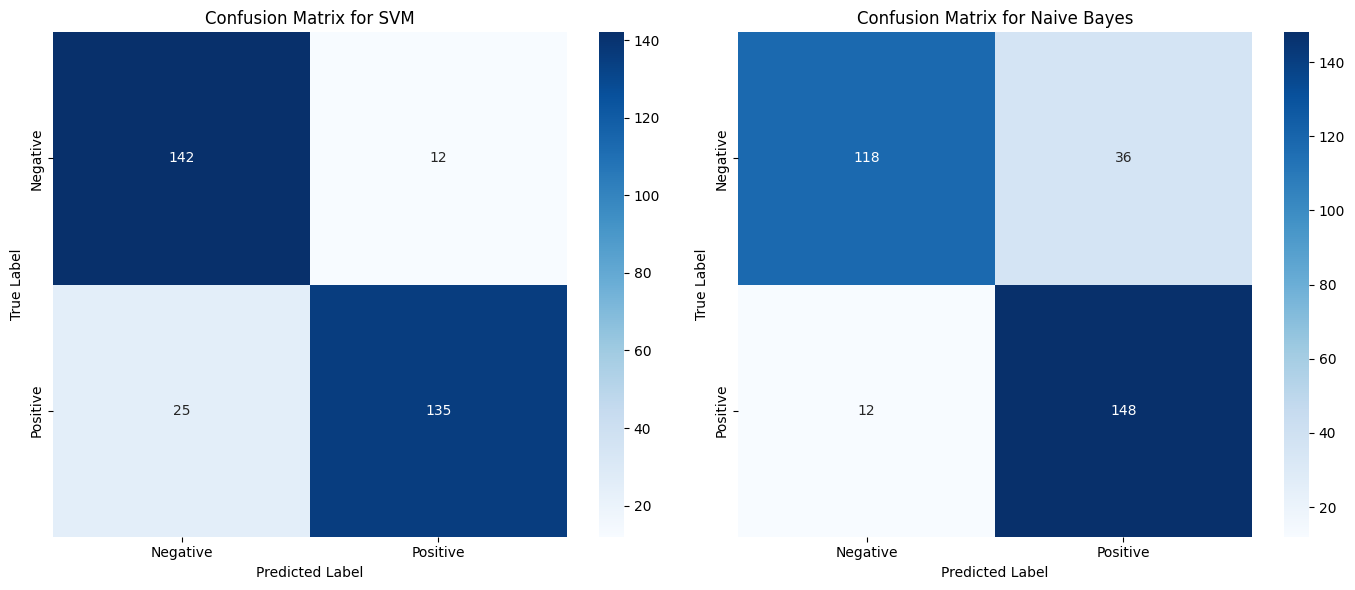

In [ ]:
# Create the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the confusion matrix for SVM
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[0])
axes[0].set_title('Confusion Matrix for SVM')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot the confusion matrix for Naive Bayes
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[1])
axes[1].set_title('Confusion Matrix for Naive Bayes')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()